In [4]:
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
from flatten_json import flatten

In [1]:
# Plotting settings
# %matplotlib notebook
# import mpld3
# mpld3.enable_notebook()
# %matplotlib notebook
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,5)

import mpld3
# mpld3.enable_notebook()
%matplotlib widget
# %matplotlib notebook
# %matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,5)

# # Plotting settings - Jupyter Lab
# import mpld3
# mpld3.enable_notebook()
# %matplotlib notebook
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,5)
# import matplotlib.dates as mdates


In [2]:
class farm_data():
    
    def __init__(self, sensor_id, start_date, end_date, max_items = '1000', auth_token = None):
        
        self.dev_id = sensor_id
        self.device_uid = 'device_uid='+self.dev_id+'&'
        self.date = 'start_date='+start_date+'&'+'end_date='+end_date
        self.limit = '&limit='+max_items
        self.base_url = 'http://pwrnet-158117.appspot.com/api/v1/farm_device_data/?'
        self.auth_token = 'adde8a3993d902769197c1db98a9ab0e88dce587'
        self.headers = {'Authorization': 'Token ' + self.auth_token}
        
    def get_data(self, url=None):
        # Check to see if id is valid
        # The first case should not be none - it should be the url -> maybe remove the url=None
        if url is None:
            try:
                resp = requests.get(self.base_url+self.device_uid+self.date+self.limit, headers=self.headers)
                resp.raise_for_status()
            except requests.exceptions.HTTPError as err:
                return None
        else:
            try:
                resp = requests.get(url, headers=self.headers)
                resp.raise_for_status()
            except requests.exceptions.HTTPError as err:
                return None
        
        data = resp.json()['results']
        if resp.json()['next'] is None:
            return data
        else:
            return (data+self.get_data(url=resp.json()['next']))
            
            
    def convert2pandas(self, raw_data):
        dev_id = int(self.dev_id)
        if raw_data is None:
            print('No data collected')
            return None
        # Checking for Lora sensors - need to automate this in case the number of lora devices grow (pull info from FarmDevice endpoint or check what type of sensr the id corresponds to)
        if dev_id < 24 and dev_id > 0:
            data_flat = [flatten(json.loads(d['device_data'])) for d in raw_data]
            return pd.DataFrame(data_flat)
        # Checking for egauge
        elif dev_id == 46613:
            data_flat = [flatten(json.loads(d['device_data'])) for d in raw_data]
            df = pd.DataFrame(data_flat)
            return df[df.columns[~df.columns.str.contains('raw_')]] # returning only processed data
        # Checking for battery
        elif dev_id == 67682 or dev_id == 67670:
            data_flat = [flatten(d['device_data']) for d in raw_data]
            return pd.DataFrame(data_flat) 
        # Checking for STD
        elif dev_id == 100000:
            df_list = []
            for d in raw_data:
                df_list.append(pd.DataFrame(d['device_data']))
            return pd.concat(df_list)
        else:
            print('No parsing available for this device ID')
            return None


In [4]:
sonnen_object = farm_data('67682','2019-08-28', '2019-09-15', max_items = '1000')
sonnen_data = sonnen_object.get_data()
sonnen_pd = sonnen_object.convert2pandas(sonnen_data)

In [7]:
sonnen_pd.head(20)

,USOC,RSOC,Timestamp,Production_W,Consumption_W,Ubat,batt_id,Fac,Uac,IsSystemInstalled,GridFeedIn_W,Pac_total_W
0,97,97,2019-08-27 17:04:06,369,0,53,67682,60,244,1,0,NaN
1,97,97,2019-08-27 17:19:04,320,0,53,67682,60,239,1,0,NaN
2,97,97,2019-08-27 17:04:04,369,0,53,67682,60,244,1,0,NaN
3,97,97,2019-08-27 17:14:04,332,0,53,67682,60,239,1,0,NaN
4,97,97,2019-08-27 17:29:07,284,0,53,67682,60,243,1,0,NaN
5,97,97,2019-08-27 17:09:04,355,0,53,67682,60,241,1,0,NaN
6,97,97,2019-08-27 17:34:04,273,0,53,67682,60,243,1,0,NaN
7,97,97,2019-08-27 17:44:04,221,0,53,67682,60,239,1,0,NaN
8,97,97,2019-08-27 18:04:05,167,0,53,67682,60,241,1,0,NaN
9,97,97,2019-08-27 17:24:10,292,0,53,67682,60,244,1,0,NaN


In [ ]:
egauge_object = farm_data('46613','2019-08-28', '2019-09-15', max_items = '1000')
egauge_data = egauge_object.get_data()
egauge_pd = egauge_object.convert2pandas(egauge_data)

In [ ]:
lora_object = farm_data('01','2019-08-28', '2019-09-15', max_items = '300')
lora_01_data = lora_object.get_data()
lora_pd = lora_object.convert2pandas(lora_01_data)

In [ ]:
std_object = farm_data('100000','2019-08-26', '2019-08-29', max_items = '1000')
std_data = std_object.get_data()
std_pd = std_object.convert2pandas(std_data)

In [ ]:
start_date = '2019-08-26'
end_date = '2019-08-28'
date = 'start_date='+start_date+'&'+'end_date='+end_date

max_items = '1000'
limit = '&limit='+max_items

dev_id = '100000'
device_uid = 'device_uid='+dev_id+'&'

url_base = 'http://pwrnet-158117.appspot.com/api/v1/farm_device_data/?'

auth_token = 'adde8a3993d902769197c1db98a9ab0e88dce587'
headers = {'Authorization': 'Token ' + auth_token}

In [ ]:
req = requests.get(url_base+device_uid+date, headers=headers)
data_prev = req.json()
data = req.json()['results']

In [ ]:
req = requests.get(url_base+device_uid+date, headers=headers)
data_prev = req.json()
data1 = req.json()['results']

In [ ]:
std_pd.head()

# Plots

# Lora

In [97]:
lora_object = farm_data('01','2019-08-28', '2019-09-15', max_items = '1000')
lora_01_data = lora_object.get_data()
lora_pd = lora_object.convert2pandas(lora_01_data)

In [98]:
lora_pd = lora_pd[['timestamp', 'rel_humidity','temperature']]
lora_pd['timestamp'] = pd.to_datetime(lora_pd['timestamp'],utc=False)
lora_pd.set_index('timestamp', inplace=True)
# lora_pd.index = lora_pd.index.tz_convert('America/Los_Angeles')
lora_pd = lora_pd.sort_index()

<IPython.core.display.Javascript object>


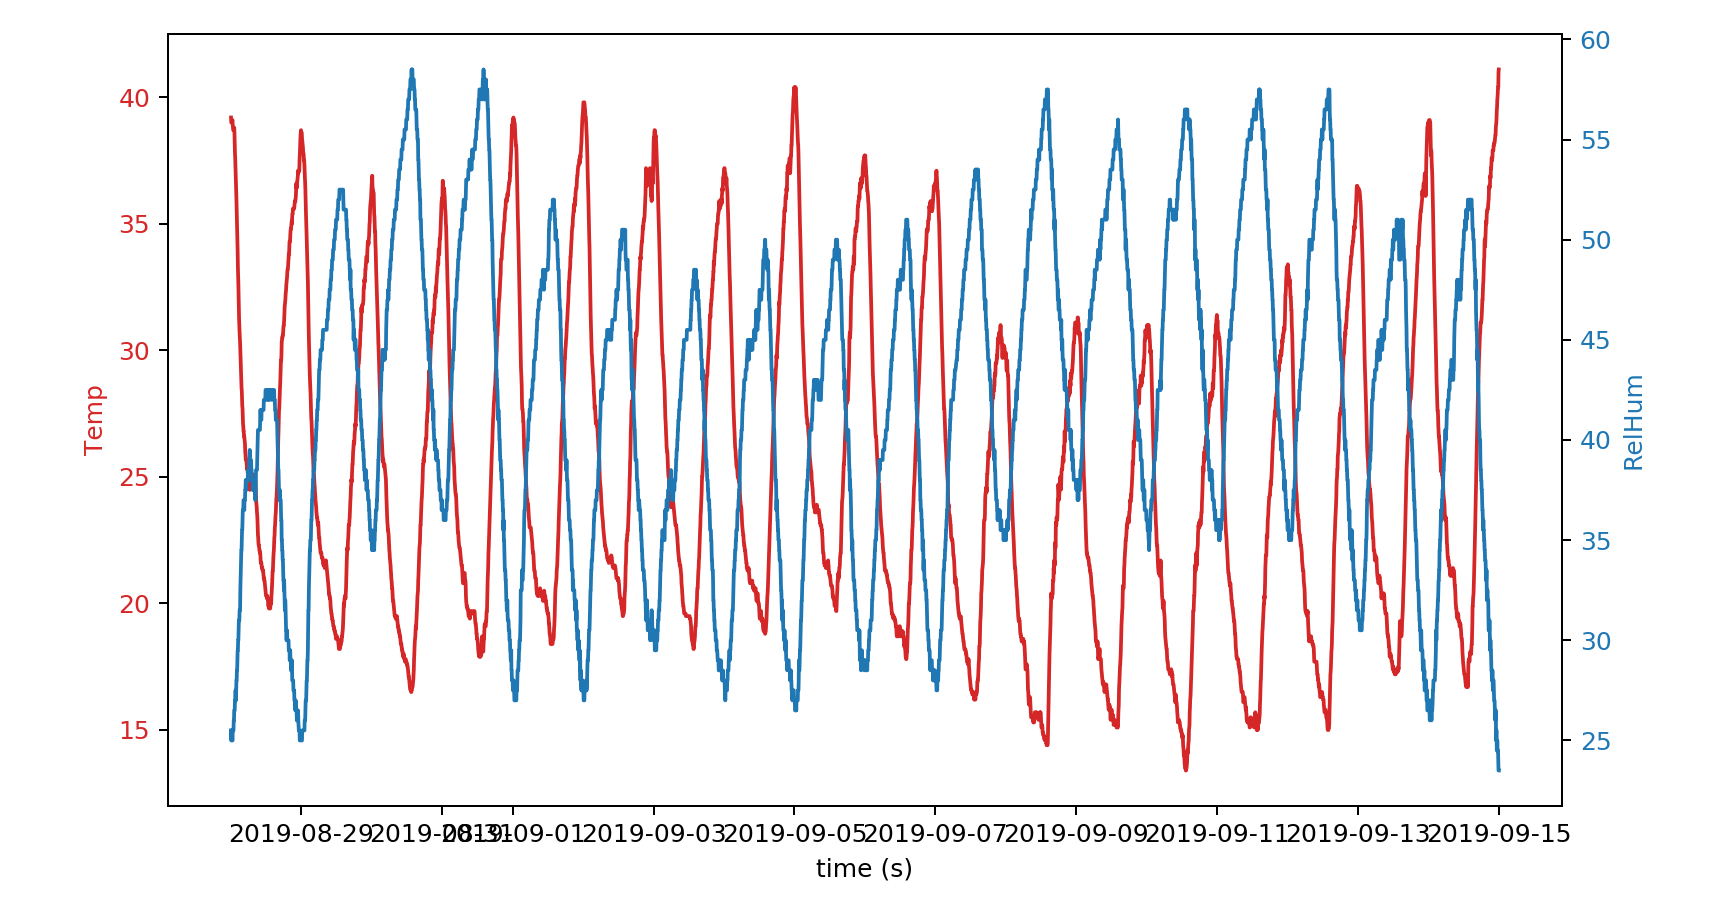

In [99]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Temp', color=color)  # we already handled the x-label with ax1
ax1.plot(lora_pd['temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RelHum', color=color)
ax2.plot(lora_pd['rel_humidity'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [93]:
lora_pd.head()

,rel_humidity,temperature
timestamp,,
2019-08-27 17:03:47-07:00,25.5,39.2
2019-08-27 17:08:46-07:00,25.0,39.0
2019-08-27 17:13:47-07:00,25.5,39.0
2019-08-27 17:18:47-07:00,25.5,39.0
2019-08-27 17:23:47-07:00,25.5,39.0


# EGauge

In [7]:
egauge_object = farm_data('46613','2019-08-28', '2019-09-15', max_items = '1000')
# egauge_object = farm_data('46613','2019-08-23', '2019-08-31', max_items = '1000')
egauge_data = egauge_object.get_data()
egauge_pd = egauge_object.convert2pandas(egauge_data)

In [5]:
egauge_object = farm_data('46613','2019-08-26', '2019-08-28', max_items = '1000')
# egauge_object = farm_data('46613','2019-08-23', '2019-08-31', max_items = '1000')
egauge_data = egauge_object.get_data()
egauge_pd = egauge_object.convert2pandas(egauge_data)

In [6]:
# egauge_pd = egauge_pd[['processed_timestamp', 'processed_CONTROL_FAN_POWER', 'processed_L1 - VOLTAGE_C', 'processed_L2 - VOLTAGE_A', 'processed_SHED_POWER', 'processed_POWER_CIRCUIT1', 'processed_POWER_CIRCUIT2']]
egauge_pd = egauge_pd[['processed_timestamp', 'processed_CONTROL_FAN_POWER', 'processed_CONTROL_FAN_POWER*', 'processed_POWER_TEST_PEN', 'processed_POWER_TEST_PEN*', 'processed_SHED_POWER', 'processed_POWER_CIRCUIT1', 'processed_POWER_CIRCUIT2','processed_L1 - VOLTAGE_C', 'processed_L2 - VOLTAGE_A']]
egauge_pd['processed_timestamp'] = pd.to_datetime(egauge_pd['processed_timestamp'], utc=True)
egauge_pd.set_index('processed_timestamp', inplace=True)
egauge_pd.index = egauge_pd.index.tz_convert('America/Los_Angeles')
egauge_pd = egauge_pd.sort_index()
egauge_pd['datetime'] = egauge_pd.index # creating datetime column
egauge_pd['date'] = egauge_pd['datetime'].dt.date # creating date column
egauge_pd['processed_POWER_CIRCUIT2'] = -egauge_pd['processed_POWER_CIRCUIT2']
egauge_pd['processed_POWER_CIRCUIT1'] = -egauge_pd['processed_POWER_CIRCUIT1']
egauge_pd['processed_SHED_POWER'] = -egauge_pd['processed_SHED_POWER']
egauge_pd['processed_CONTROL_FAN_POWER'] = -egauge_pd['processed_CONTROL_FAN_POWER']
# egauge_pd['processed_CONTROL_FAN_POWER*'] = -egauge_pd['processed_CONTROL_FAN_POWER*']
egauge_pd['processed_POWER_TEST_PEN'] = -egauge_pd['processed_POWER_TEST_PEN']
# egauge_pd['processed_POWER_TEST_PEN*'] = -egauge_pd['processed_POWER_TEST_PEN*']
egauge_pd['POWER_TEST_FANS'] = egauge_pd['processed_POWER_CIRCUIT1']+egauge_pd['processed_POWER_CIRCUIT2']
egauge_pd['POWER_TEST_PEN'] = egauge_pd['POWER_TEST_FANS'] + egauge_pd['processed_SHED_POWER']

In [19]:
egauge_pd.head()

,processed_CONTROL_FAN_POWER,processed_CONTROL_FAN_POWER*,processed_POWER_TEST_PEN,processed_POWER_TEST_PEN*,processed_SHED_POWER,processed_POWER_CIRCUIT1,processed_POWER_CIRCUIT2,processed_L1 - VOLTAGE_C,processed_L2 - VOLTAGE_A,datetime,date,POWER_TEST_FANS,POWER_TEST_PEN
processed_timestamp,,,,,,,,,,,,,
2019-08-25 17:02:20-07:00,27329,NaN,NaN,NaN,230,4658,5510,236,239,2019-08-25 17:02:20-07:00,2019-08-25,10168,10398
2019-08-25 17:04:03-07:00,27316,NaN,NaN,NaN,529,4747,5604,236,239,2019-08-25 17:04:03-07:00,2019-08-25,10351,10880
2019-08-25 17:07:20-07:00,27262,NaN,NaN,NaN,1224,4838,5715,236,238,2019-08-25 17:07:20-07:00,2019-08-25,10553,11777
2019-08-25 17:09:03-07:00,27326,NaN,NaN,NaN,-221,4933,5793,236,239,2019-08-25 17:09:03-07:00,2019-08-25,10726,10505
2019-08-25 17:12:20-07:00,27225,NaN,NaN,NaN,774,5001,5898,236,238,2019-08-25 17:12:20-07:00,2019-08-25,10899,11673


In [7]:
# Real Power

# fig, ax = plt.subplots()
# hours = mdates.HourLocator(interval = 1)
# h_fmt = mdates.DateFormatter('%H:%M:%S')

# # df.plot(ax = ax, color = 'black', linewidth = 0.4, x_compat=True)
# egauge_pd.plot(y=['processed_POWER_TEST_PEN', 'processed_CONTROL_FAN_POWER', 'POWER_TEST_FANS'], x_compat=True)
# #Then tick and format with matplotlib:
# ax.xaxis.set_major_locator(hours)
# ax.xaxis.set_major_formatter(h_fmt)

# fig.autofmt_xdate()
# plt.show()

ax = egauge_pd.plot(y=['processed_POWER_TEST_PEN', 'processed_CONTROL_FAN_POWER', 'POWER_TEST_FANS'], x_compat=True)
ax.set_ylabel('Power [W]')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<IPython.core.display.Javascript object>


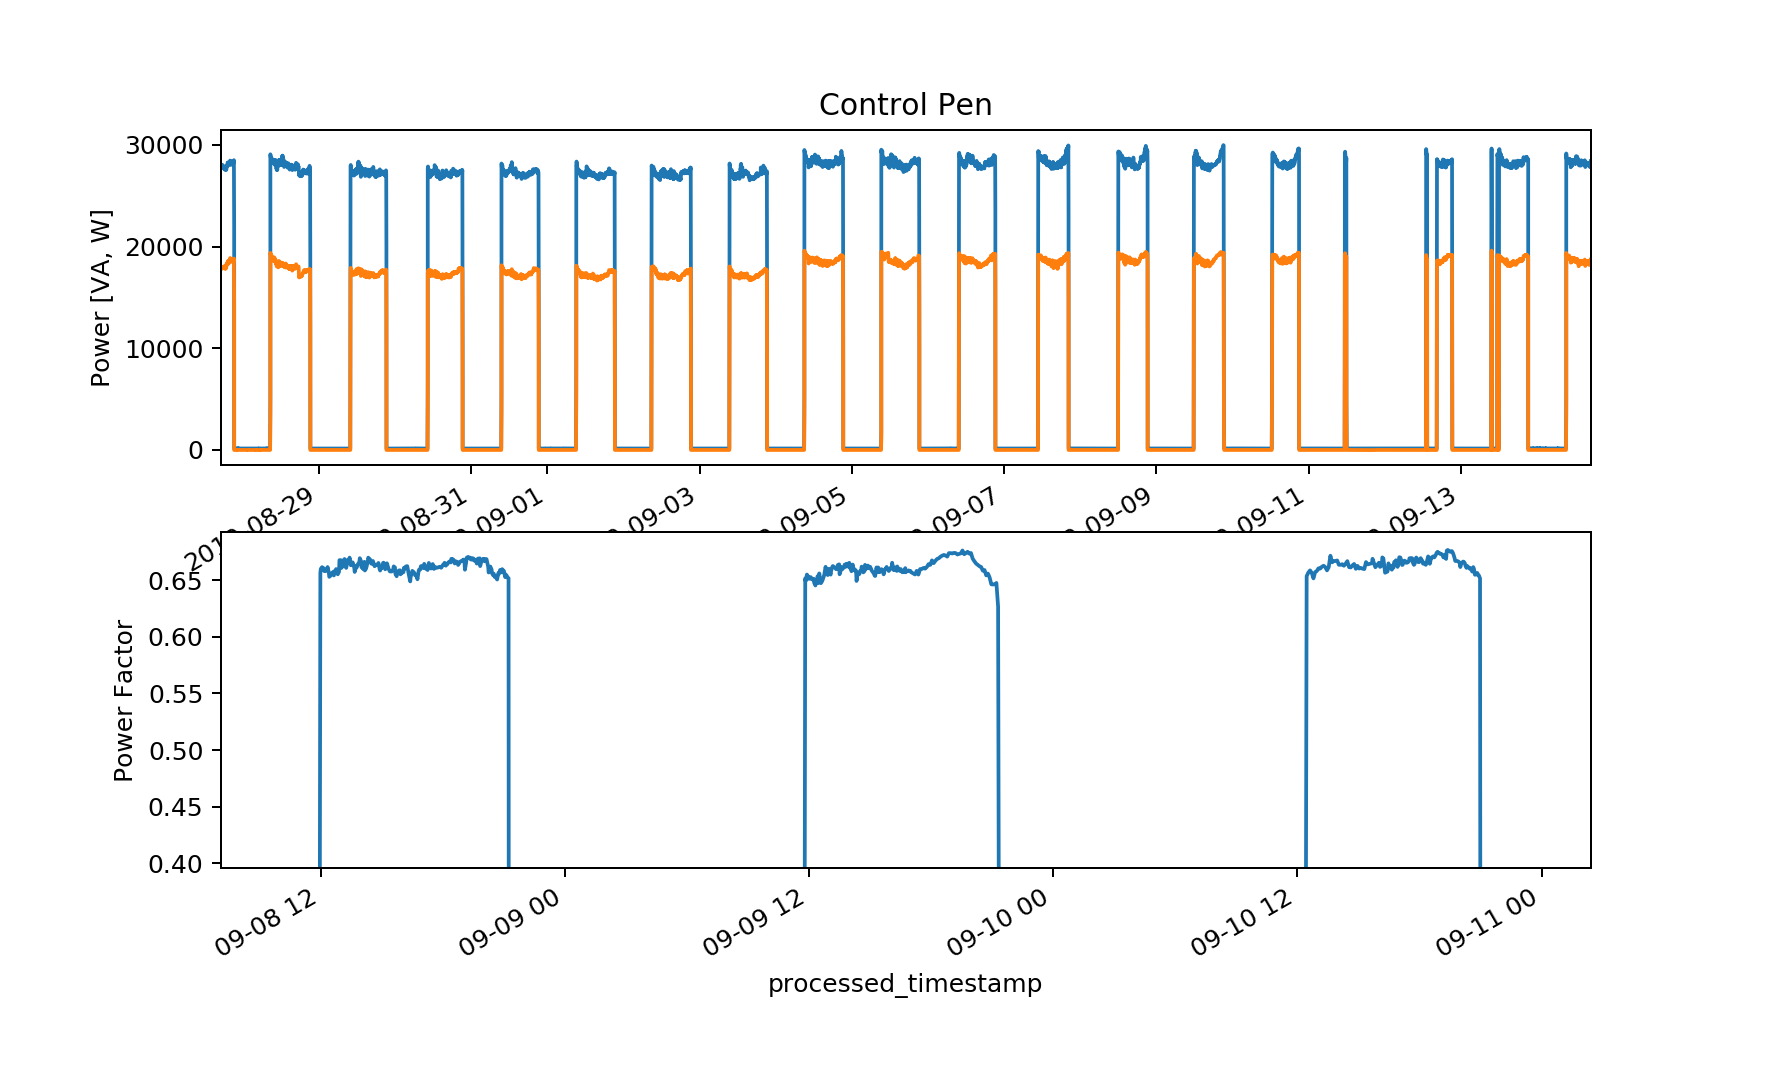

Text(0, 0.5, 'Power Factor')

In [34]:
# CONTROL PEN - POWER AND POWER FACTOR
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Insights on Power Factor for Control Pen
egauge_pd.plot(y=['processed_CONTROL_FAN_POWER*', 'processed_CONTROL_FAN_POWER'], ax=ax1, legend=False)
ax1.set_ylabel('Power [VA, W]')
ax1.set_title('Control Pen')

# Power Factor: Real/Apparent
pfControlPen_all = abs(egauge_pd['processed_CONTROL_FAN_POWER'])/abs(egauge_pd['processed_CONTROL_FAN_POWER*'])
pfControlPen_all.plot(ax=ax2)
ax2.set_ylabel('Power Factor')

In [14]:
import scipy as sp
import scipy.signal as sg

182.5

In [17]:
# We create a 4-th order Butterworth low-pass filter.
b, a = sg.butter(4, 2. / 365, 'low')

<IPython.core.display.Javascript object>


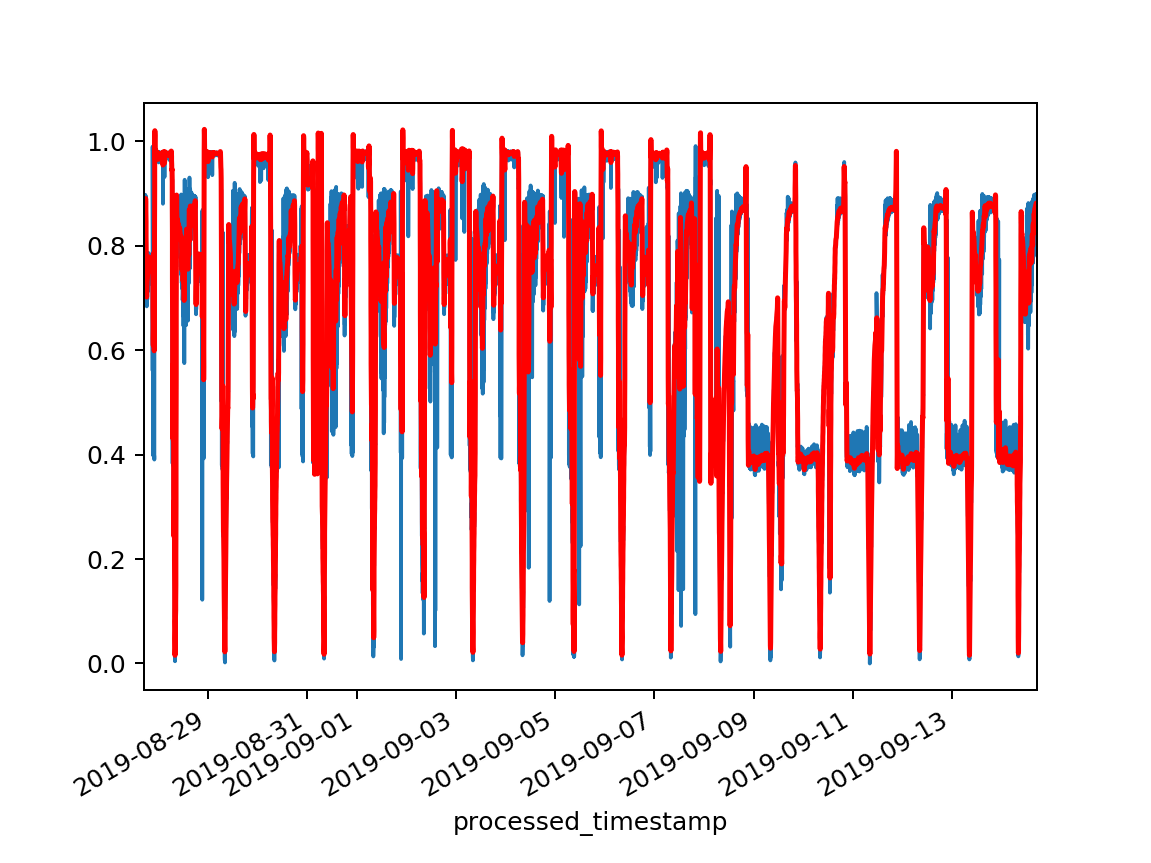

In [33]:
fig, ax = plt.subplots(1, 1)
# nasdaq.plot(ax=ax, lw=3)
pfTestPen_all = abs(egauge_pd['processed_POWER_TEST_PEN'])/abs(egauge_pd['processed_POWER_TEST_PEN*'])
pfTestPen_all.plot(ax=ax)
date = egauge_pd.index
# We create a 4-th order Butterworth low-pass filter.
b, a = sg.butter(4, 2. / 10)
# We apply this filter to the signal.
ax.plot_date(date, sg.filtfilt(b, a, pfTestPen_all),'-r', lw=2)


<IPython.core.display.Javascript object>


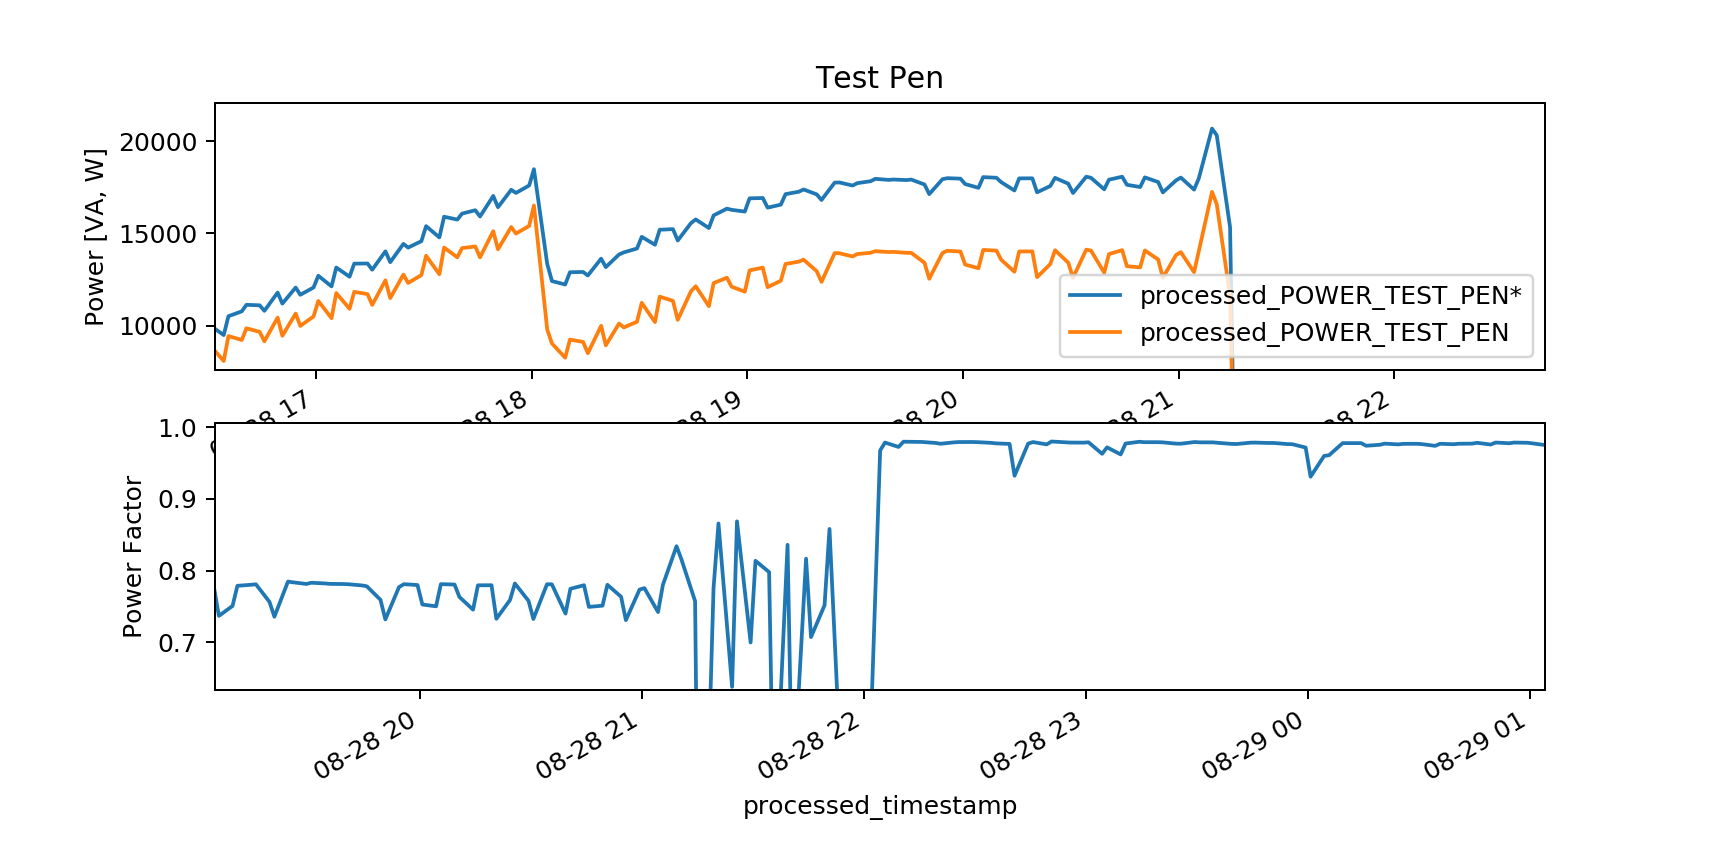

Text(0, 0.5, 'Power Factor')

In [43]:
# TEST PEN - POWER AND POWER FACTOR
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Insights on Power Factor for Control Pen
egauge_pd.plot(y=['processed_POWER_TEST_PEN*', 'processed_POWER_TEST_PEN'], ax=ax1, legend=True)
ax1.set_ylabel('Power [VA, W]')
ax1.set_title('Test Pen')

# Power Factor: Real/Apparent
pfTestPen_all = abs(egauge_pd['processed_POWER_TEST_PEN'])/abs(egauge_pd['processed_POWER_TEST_PEN*'])
pfTestPen_all.plot(ax=ax2)
ax2.set_ylabel('Power Factor')
# date = egauge_pd.index
# # We create a 4-th order Butterworth low-pass filter.
# b, a = sg.butter(4, 2. / 20)
# # We apply this filter to the signal.
# ax2.plot_date(date, sg.filtfilt(b, a, pfTestPen_all),'-b', lw=1)


<IPython.core.display.Javascript object>


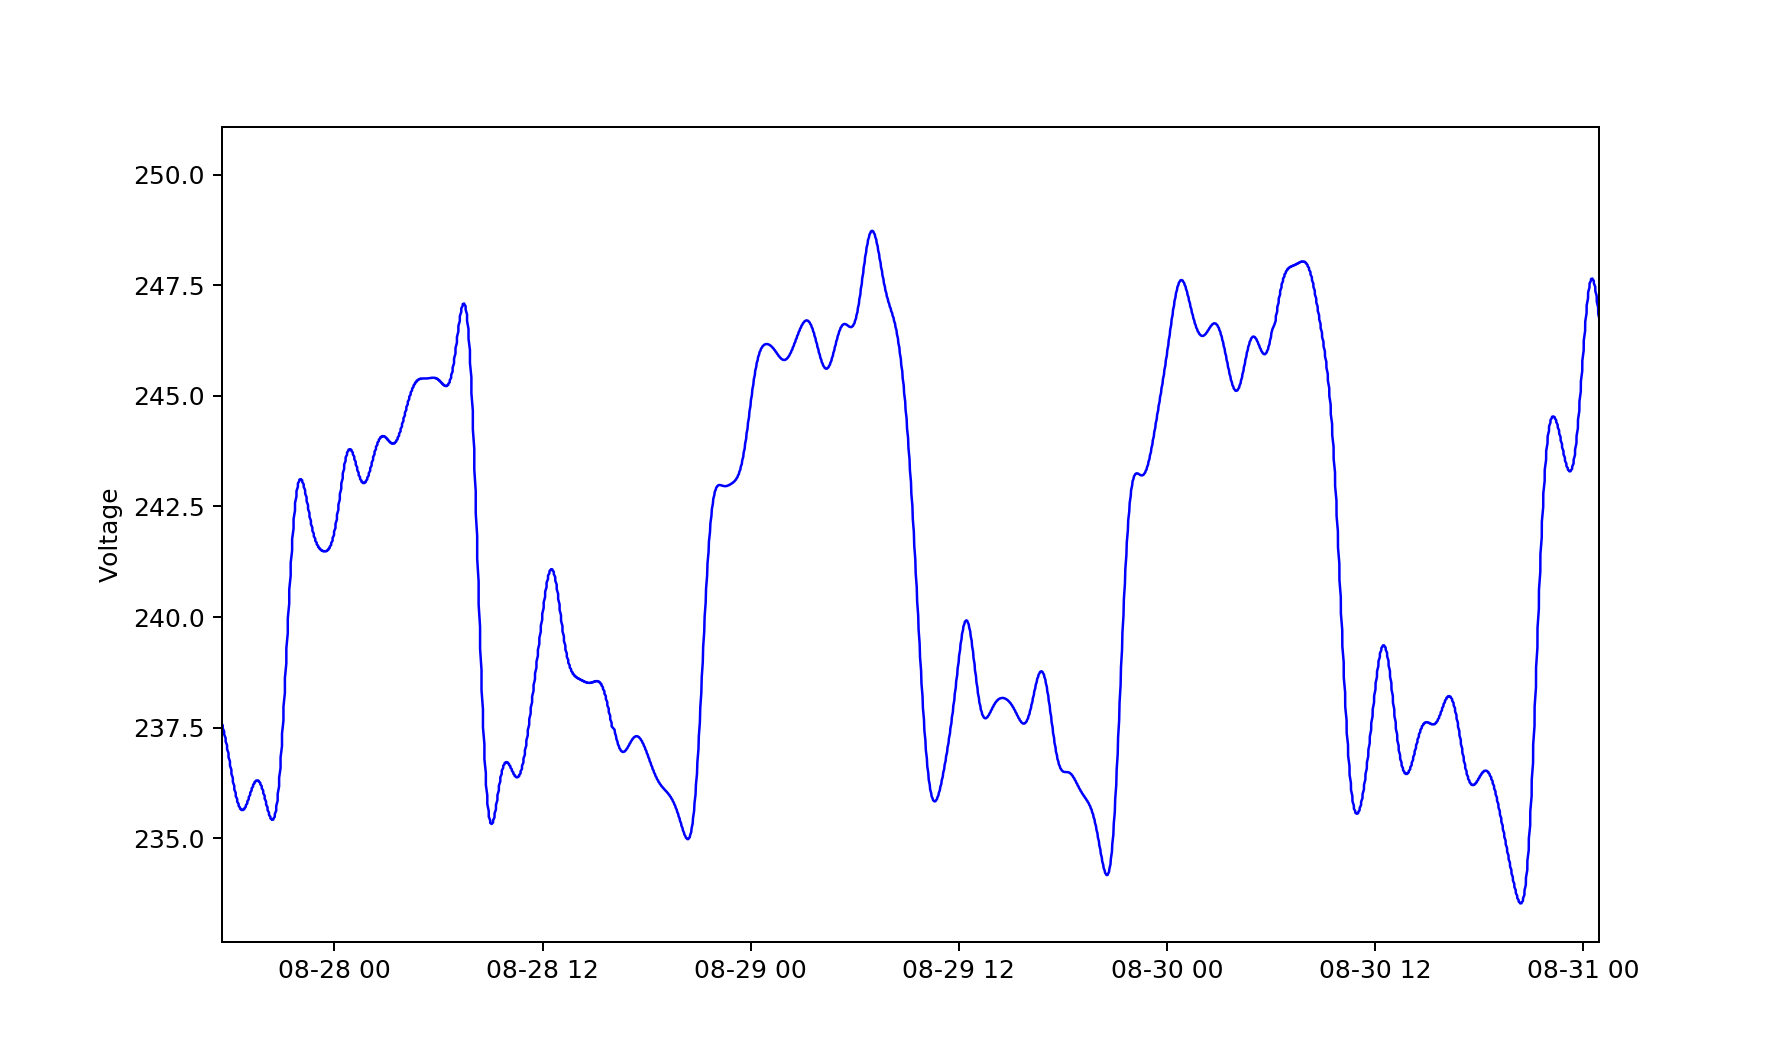

Text(0, 0.5, 'Voltage')

In [45]:
# Voltage
fig, ax = plt.subplots(1, 1)
# egauge_pd.plot(y=['processed_L1 - VOLTAGE_C', 'processed_L2 - VOLTAGE_A'])
date = egauge_pd.index
# We create a 4-th order Butterworth low-pass filter.
b, a = sg.butter(4, 2. / 40)
# We apply this filter to the signal.
L1 = egauge_pd['processed_L1 - VOLTAGE_C']
ax.plot_date(date, sg.filtfilt(b, a, L1),'-b', lw=1)
ax.set_ylabel('Voltage')

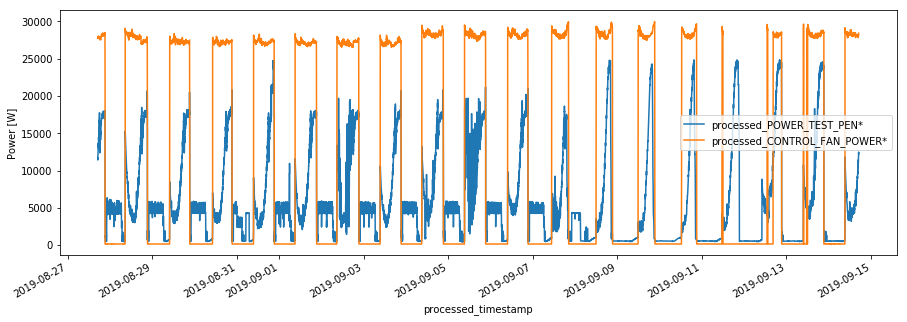

In [10]:
# Apparent Power
ax = egauge_pd.plot(y=['processed_POWER_TEST_PEN*', 'processed_CONTROL_FAN_POWER*'])
ax.set_ylabel('Power [W]')
plt.show()

# Daily Profile

In [55]:
# Daily profiles
day = egauge_pd.loc[str(egauge_pd['date'].unique()[3])]
day['delta'] = (day['datetime']-day['datetime'].shift()).fillna(0)

/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


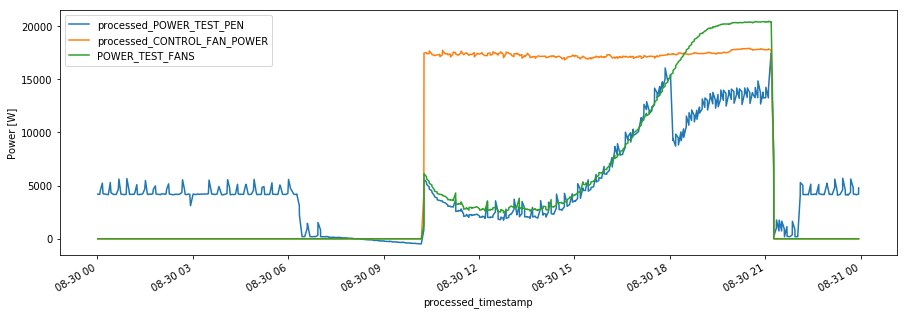

In [56]:
# Real Power
ax = day.plot(y=['processed_POWER_TEST_PEN', 'processed_CONTROL_FAN_POWER', 'POWER_TEST_FANS'])
ax.set_ylabel('Power [W]')
plt.show()

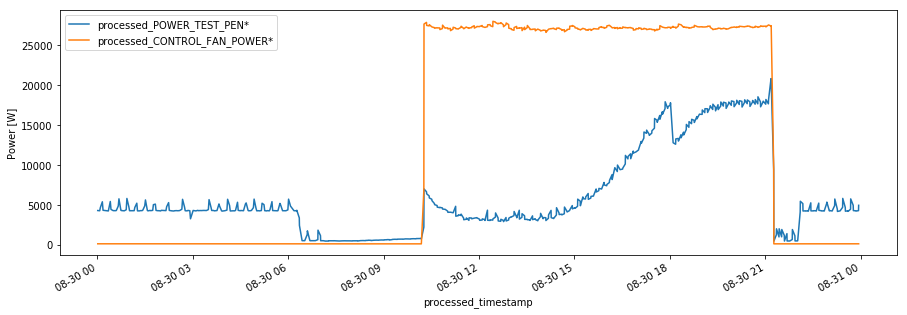

In [57]:
# Apparent Power
ax = day.plot(y=['processed_POWER_TEST_PEN*', 'processed_CONTROL_FAN_POWER*'])
ax.set_ylabel('Power [W]')
plt.show()

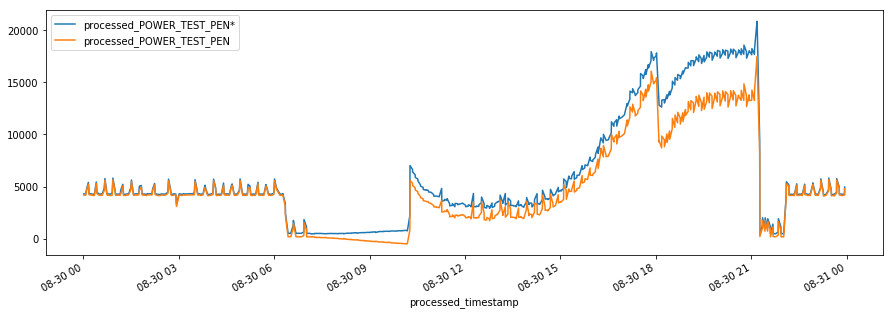

In [58]:
# Insights on Power Factor for Test Pen
ax = day.plot(y=['processed_POWER_TEST_PEN*', 'processed_POWER_TEST_PEN'])

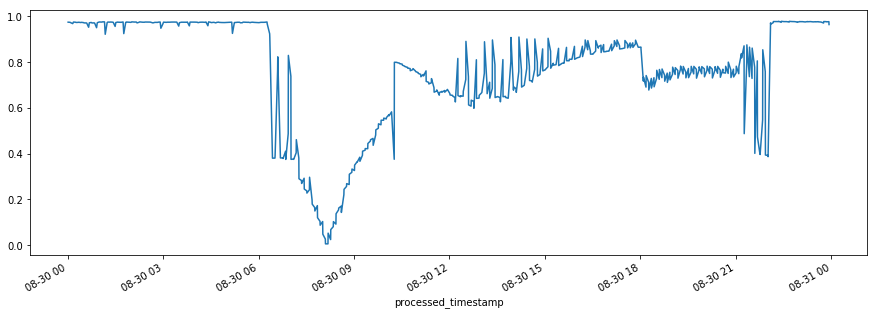

In [59]:
# Power Factor: Real/Apparent
pfTestPen = abs(day['processed_POWER_TEST_PEN'])/abs(day['processed_POWER_TEST_PEN*'])
pfTestPen.plot()

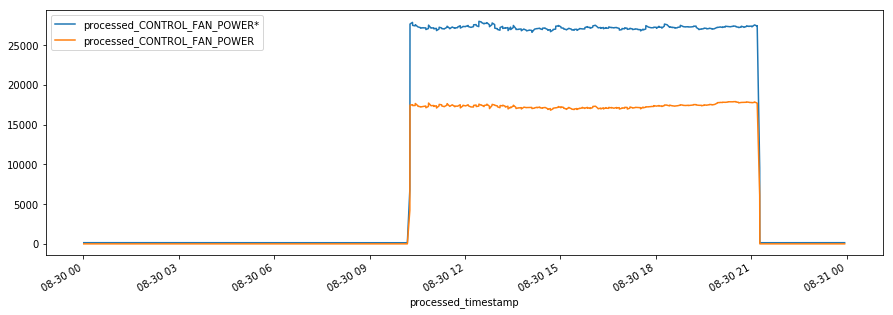

In [60]:
# Insights on Power Factor for Control Pen
ax = day.plot(y=['processed_CONTROL_FAN_POWER*', 'processed_CONTROL_FAN_POWER'])

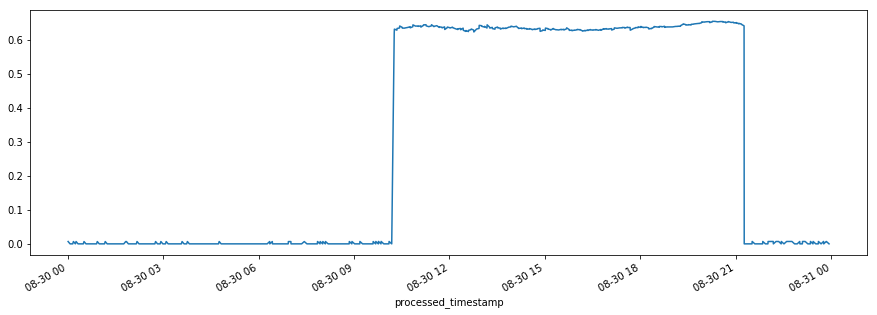

In [61]:
# Power Factor: Real/Apparent
pfControlPen = abs(day['processed_CONTROL_FAN_POWER'])/abs(day['processed_CONTROL_FAN_POWER*'])
pfControlPen.plot()


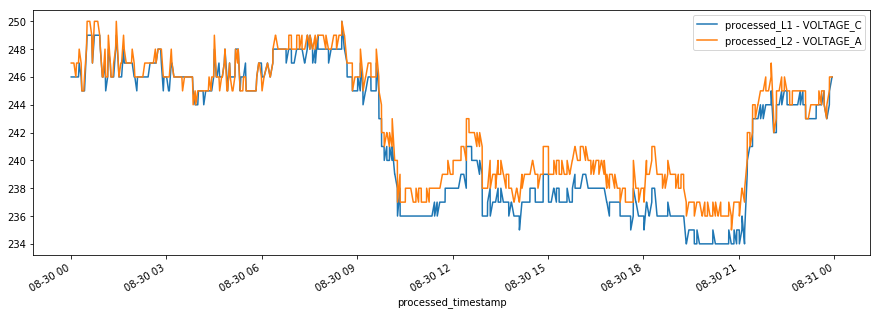

In [62]:
# Voltage
ax = day.plot(y=['processed_L1 - VOLTAGE_C', 'processed_L2 - VOLTAGE_A'])

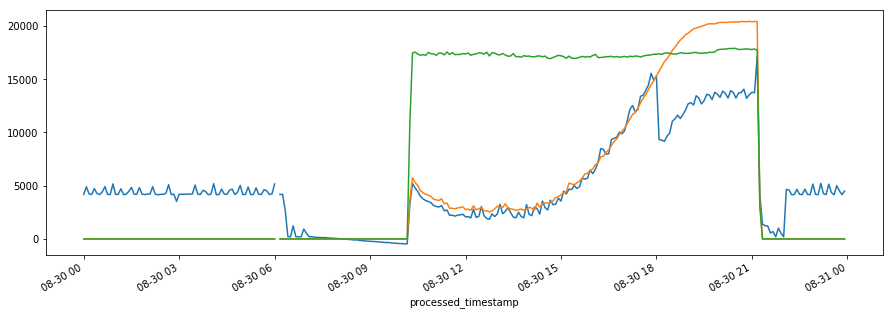

In [63]:
test5min = day['processed_POWER_TEST_PEN'].resample('5min').mean() # Sampled at 5min
fans5min = day['POWER_TEST_FANS'].resample('5min').mean() # Sampled at 5min
control5min = day['processed_CONTROL_FAN_POWER'].resample('5min').mean() # Sampled at 5min

test5min.plot()
fans5min.plot()
control5min.plot()
plt.show()


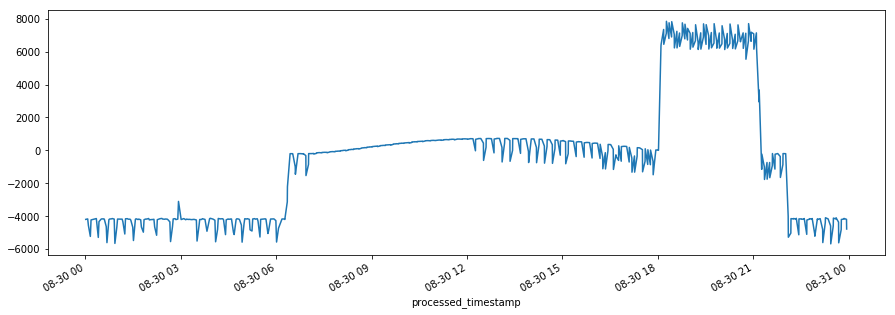

In [64]:
# Battery offset:
batt_offset = day['POWER_TEST_FANS'] - day['processed_POWER_TEST_PEN']
batt_offset.plot()

totE_solar:  104.946625
totE_batt_solar:  118.140375


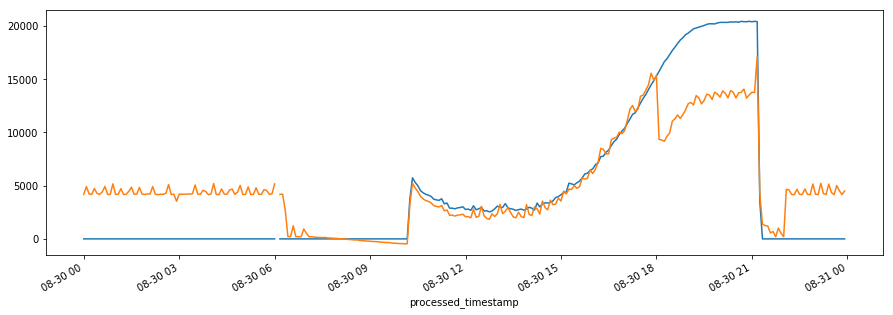

In [65]:
totE_solar_only = day['POWER_TEST_FANS'].resample('5min').mean() # Sampled at 5min
totE_solar_only.plot()
print('totE_solar: ', totE_solar_only.sum()/12000)
totE_batt_solar = day['POWER_TEST_PEN'].resample('5min').mean()
print('totE_batt_solar: ', totE_batt_solar.sum()/12000)
totE_batt_solar.plot()

# STD

In [17]:
std_object = farm_data('100000','2019-08-28', '2019-09-15', max_items = '1000')
std_data = std_object.get_data()
std_pd = std_object.convert2pandas(std_data)

/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

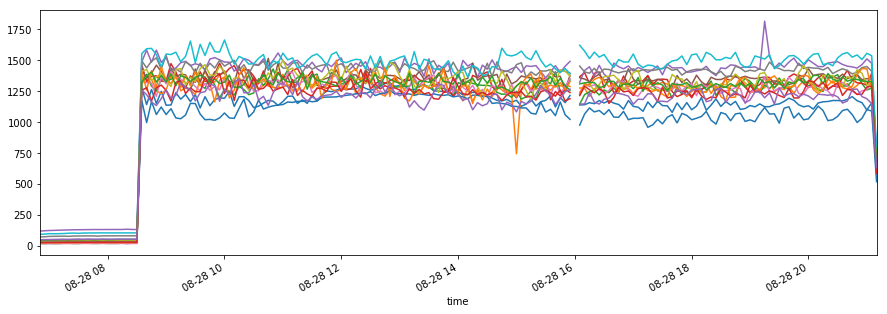

In [22]:
fans = std_pd.groupby('serial_number')
fans.first()
# # sensor = 282322

blenders_id = ['697151','766935','697145','766944','697149','766929','697160','697147','697156','766940','697153','697144','697146','766936','697157']
fans_energy = dict.fromkeys(blenders_id, None)

for b in blenders_id:
    fan = fans.get_group(int(b))
    fan = fan.drop_duplicates()
    fan['time'] = pd.to_datetime(fan['time'], utc=True)
    fan['date'] = fan['time'].dt.date # creating date column
    fan.set_index('time', inplace=True)
    fan.index = fan.index.tz_convert('America/Los_Angeles')
    fan = fan.sort_index()
    day = fan.loc[str(fan['date'].unique()[0])]
    day['Power'] = day['pv_power']+day['grid_power']
    energy = day['Power'].sum()/12000
    fans_energy[b] = energy
    fan5min = day['Power'].resample('5min').mean()
    fan5min.plot()



In [25]:
fan5min.fillna(method='bfill')
fan5min.isna().sum()

1

In [67]:
fanpv_list = []
fangrid_list = []
for b in blenders_id:
    fan = fans.get_group(int(b))
    fan['time'] = pd.to_datetime(fan['time'], utc=True)
    fan['date'] = fan['time'].dt.date # creating date column
    fan.set_index('time', inplace=True)
    fan.index = fan.index.tz_convert('America/Los_Angeles')
    fan = fan.sort_index()
    fan = fan.drop_duplicates()
    fan5min_pv = fan['pv_power'].resample('5min').mean()
    fanpv_list.append(fan5min_pv)
    fan5min_grid = fan['grid_power'].resample('5min').mean()
    fangrid_list.append(fan5min_grid)
    


/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


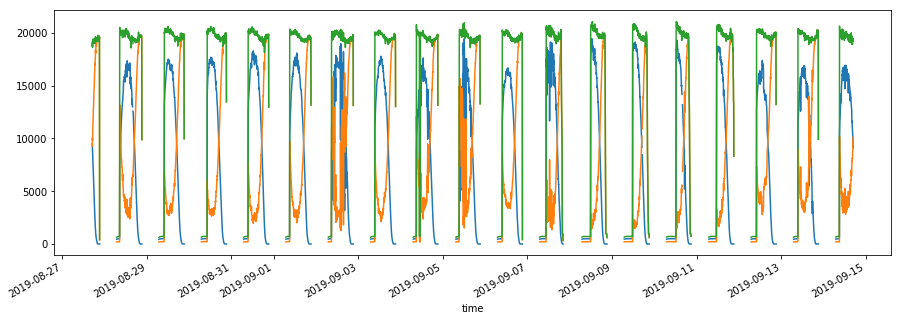

In [68]:
fanpv = sum(fanpv_list)
fangrid = sum(fangrid_list)
fantotal = fangrid+fanpv
fanpv.plot()
fangrid.plot()
fantotal.plot()
# print(max(egauge_pd['POWER_TEST_FANS']) - max(fanpv))

In [43]:
fan = fans.get_group(697151)
fan['time'] = pd.to_datetime(fan['time'], utc=True)
fan['date'] = fan['time'].dt.date # creating date column
fan.set_index('time', inplace=True)
fan.index = fan.index.tz_convert('America/Los_Angeles')
fan = fan.sort_index()
fan = fan.drop_duplicates()
fan = fan.resample('5min').mean()

/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


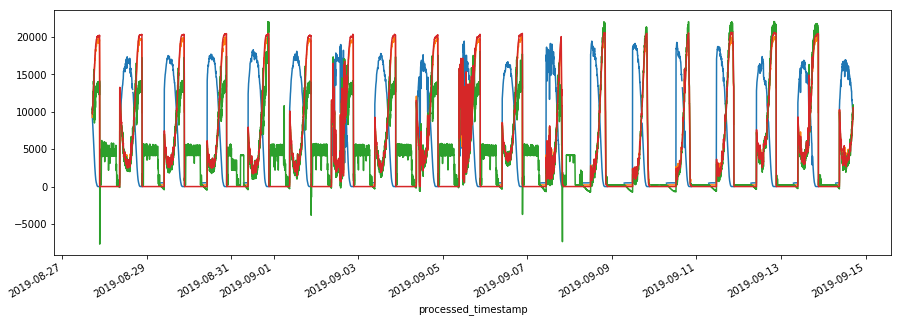

In [69]:
# Comparisson between Egauge and STD measurements
fanpv.plot()
fangrid.plot()
egauge_pd['processed_POWER_TEST_PEN'].plot()
egauge_pd['POWER_TEST_FANS'].plot()

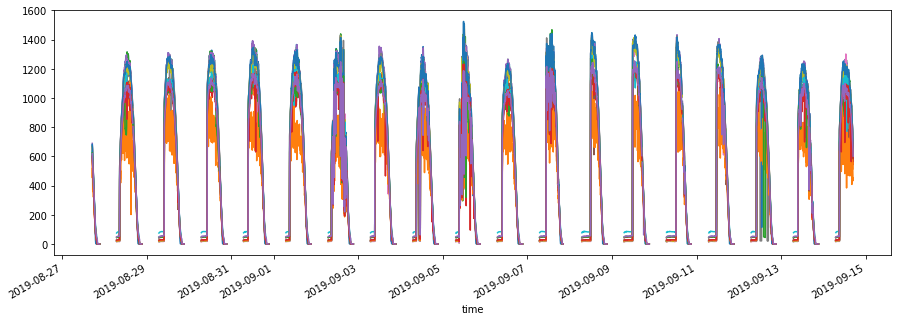

In [70]:
# Solar Power in each fan
for p in fanpv_list:
    p.plot()

In [ ]:
fans['time'] = pd.to_datetime(fans['time'], utc=True)
# fans.set_index('time', inplace=True)
# fans.index = fans.index.tz_convert('America/Los_Angeles')
# fans = fans.sort_index()
# fans['date'] = fans['time'].dt.date # creating date column
# day = fans.loc[str(fans['date'].unique()[1])]


In [ ]:
f = std_pd
f['time'] = pd.to_datetime(f['time'], utc=True)
f['date'] = f['time'].dt.date # creating date column
f.set_index('time', inplace=True)
f.index = f.index.tz_convert('America/Los_Angeles')
f = f.sort_index()
day = f.loc[str(f['date'].unique()[0])]



# Power Start/Stop Detection

In [71]:
# Creating new dataframe
df_5min = pd.DataFrame()
df_5min['testPen'] = test5min
df_5min['testFans'] = fans5min
df_5min['controlPen'] = control5min
# Creating Virtual Fan Load (without solar/battery -> based on maximum power)
df_5min['virtualFans'] = df_5min['controlPen']
df_5min.loc[df_5min['virtualFans'] > 3500, 'virtualFans'] = max(df_5min['testFans'])
# Finding dP
df_5min['dP'] = df_5min['controlPen'] - df_5min['controlPen'].shift(1)
df_5min['dP'].fillna(0, inplace=True)
# Finding max and min dP index
time_on = df_5min.loc[df_5min['dP'] == max(df_5min['dP'])]
time_off = df_5min.loc[df_5min['dP'] == min(df_5min['dP'])]
start = time_on.index.hour-1
stop = time_off.index.hour+1
# Creating mask
time_mask = (df_5min.index.hour >= start[0]) & (df_5min.index.hour < stop[0])
# Final df
df_day = df_5min[time_mask]



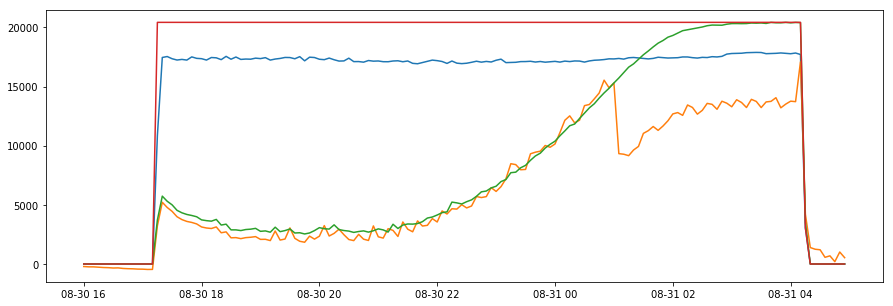

In [72]:
# ADD PLOT LEGEND
plt.plot(df_day['controlPen'])
plt.plot(df_day['testPen'])
plt.plot(df_day['testFans'])
plt.plot(df_day['virtualFans'])

# Total Energy

In [73]:
testPenE = df_day['testPen'].sum()/12000 # FANS, SOLAR, BATTERY AND EVERYTHING INSIDE SHED
testFansE = df_day['testFans'].sum()/12000 # SOLAR AND FANS
virtualFansE = df_day['virtualFans'].sum()/12000 # ONLY FANS (NO BLENDERS OR BATTERIES)
controlPenE = df_day['controlPen'].sum()/12000 # CONTROL PEN
print(testPenE, testFansE, virtualFansE, controlPenE)

81.567875 104.93366666666667 224.99025 190.37158333333332


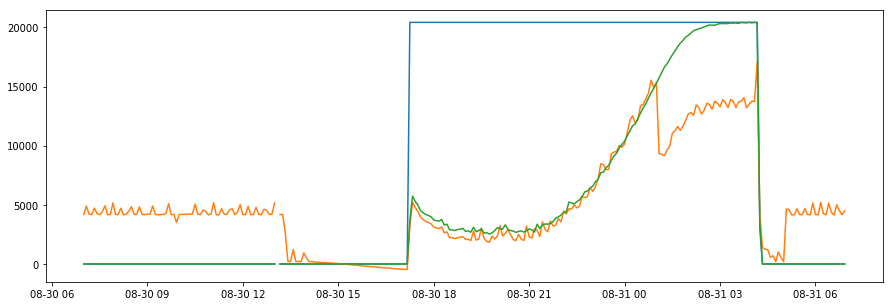

In [74]:
plt.plot(df_5min['virtualFans'])
plt.plot(df_5min['testPen'])
plt.plot(df_5min['testFans'])

In [75]:
# 1-testFansE/virtualFansE
testFansE/virtualFansE # HOW MUCH ENERGY SYSTEM IS OFFSETING DURING FAN OPERATION TIME WINDOW

0.4663920621745461

In [ ]:
# Develop a function that concatenate multiple days in a row: input: start date, end date -> use a mask to pick the rows with dates to visualize


# Cost Analysis

In [113]:
# Include demand charges in the calculations. Break down data into peak hours (12-6) and non-peak, resample for 15min interval and calculate the maximum power over that time period
# Input Variables
energy_pk_summer = 0.31752 # $/kWh
energy_opk_summer = 0.16888 # $/kWh
demand_max_summer = 10.77 # $/kW -> Maximum demand during billing cycle
demand_max_pk_summer = 5.79 # $/kW -> Maximum demand during pek hours for billing cycle
pk_hours_start = 12
pk_hours_end = 18



In [114]:
# Loading data:
egauge_object = farm_data('46613','2019-08-23', '2019-08-31', max_items = '1000')
egauge_data = egauge_object.get_data()
egauge_pd = egauge_object.convert2pandas(egauge_data)
# Processing
egauge_pd = egauge_pd[['processed_timestamp', 'processed_CONTROL_FAN_POWER', 'processed_CONTROL_FAN_POWER*', 'processed_POWER_TEST_PEN', 'processed_POWER_TEST_PEN*', 'processed_SHED_POWER', 'processed_POWER_CIRCUIT1', 'processed_POWER_CIRCUIT2','processed_L1 - VOLTAGE_C', 'processed_L2 - VOLTAGE_A']]
egauge_pd['processed_timestamp'] = pd.to_datetime(egauge_pd['processed_timestamp'], utc=True)
egauge_pd.set_index('processed_timestamp', inplace=True)
egauge_pd.index = egauge_pd.index.tz_convert('America/Los_Angeles')
egauge_pd = egauge_pd.sort_index()
egauge_pd['datetime'] = egauge_pd.index # creating datetime column
egauge_pd['date'] = egauge_pd['datetime'].dt.date # creating date column
egauge_pd['processed_POWER_CIRCUIT2'] = -egauge_pd['processed_POWER_CIRCUIT2']
egauge_pd['processed_POWER_CIRCUIT1'] = -egauge_pd['processed_POWER_CIRCUIT1']
egauge_pd['processed_SHED_POWER'] = -egauge_pd['processed_SHED_POWER']
egauge_pd['processed_CONTROL_FAN_POWER'] = -egauge_pd['processed_CONTROL_FAN_POWER']
# egauge_pd['processed_CONTROL_FAN_POWER*'] = -egauge_pd['processed_CONTROL_FAN_POWER*']
egauge_pd['processed_POWER_TEST_PEN'] = -egauge_pd['processed_POWER_TEST_PEN']
# egauge_pd['processed_POWER_TEST_PEN*'] = -egauge_pd['processed_POWER_TEST_PEN*']
egauge_pd['POWER_TEST_FANS'] = egauge_pd['processed_POWER_CIRCUIT1']+egauge_pd['processed_POWER_CIRCUIT2']
egauge_pd['POWER_TEST_PEN'] = egauge_pd['POWER_TEST_FANS'] + egauge_pd['processed_SHED_POWER']

/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/envs/venv_egauge/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


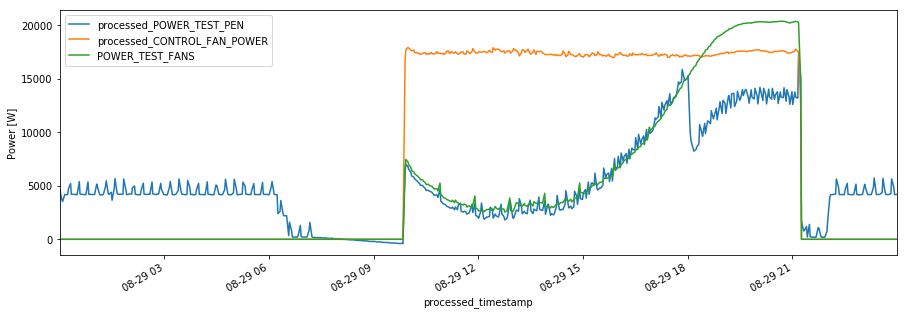

In [115]:
# Daily profiles
day = egauge_pd.loc[str(egauge_pd['date'].unique()[7])]
day['delta'] = (day['datetime']-day['datetime'].shift()).fillna(0)
# Real Power
ax = day.plot(y=['processed_POWER_TEST_PEN', 'processed_CONTROL_FAN_POWER', 'POWER_TEST_FANS'])
ax.set_ylabel('Power [W]')
plt.show()

In [116]:
# Resampling to 15 minute interval

test15min = day['processed_POWER_TEST_PEN'].resample('15min').mean() # Sampled at 5min
fans15min = day['POWER_TEST_FANS'].resample('15min').mean() # Sampled at 5min
control15min = day['processed_CONTROL_FAN_POWER'].resample('15min').mean() # Sampled at 5min

# test5min.plot()
# fans5min.plot()
# control5min.plot()
# plt.show()


In [117]:
df_15min.index = df_15min.index.tz_localize(None)
df_15min.head()

,testPen,testFans,controlPen,virtualFans,dP
processed_timestamp,,,,,
2019-08-29 00:00:00,4065.833333,1.333333,-0.333333,-0.333333,0.000000
2019-08-29 00:15:00,4443.333333,1.000000,-0.166667,-0.166667,0.166667
2019-08-29 00:30:00,4385.833333,1.666667,-0.666667,-0.666667,-0.500000
2019-08-29 00:45:00,4378.833333,1.500000,-0.166667,-0.166667,0.500000
2019-08-29 01:00:00,4448.666667,1.500000,-0.500000,-0.500000,-0.333333


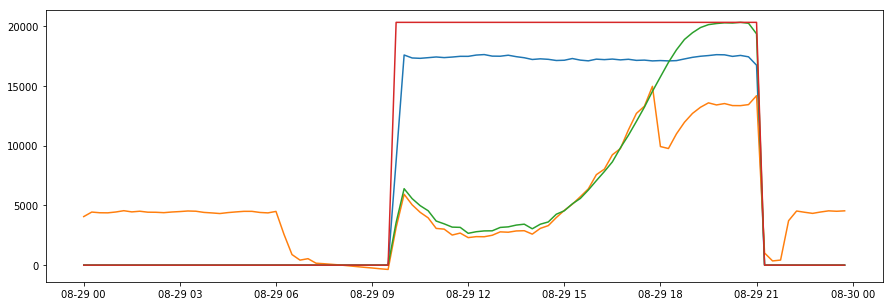

In [118]:
df_15min = pd.DataFrame()
df_15min['testPen'] = test15min
df_15min['testFans'] = fans15min
df_15min['controlPen'] = control15min
df_15min.index = df_15min.index.tz_localize(None)
# Creating Virtual Fan Load (without solar/battery -> based on maximum power)
df_15min['virtualFans'] = df_15min['controlPen']
df_15min.loc[df_15min['virtualFans'] > 3500, 'virtualFans'] = max(df_15min['testFans'])
# Finding dP
df_15min['dP'] = df_15min['controlPen'] - df_15min['controlPen'].shift(1)
df_15min['dP'].fillna(0, inplace=True)
# Finding max and min dP index
time_on = df_15min.loc[df_15min['dP'] == max(df_15min['dP'])]
time_off = df_15min.loc[df_15min['dP'] == min(df_15min['dP'])]
start = time_on.index.hour-1
stop = time_off.index.hour+1
# # Creating mask
# time_mask = (df_15min.index.hour >= start[0]) & (df_15min.index.hour < stop[0])
# # Final df
# df_day = df_15min[time_mask]
plt.plot(df_15min['controlPen'])
plt.plot(df_15min['testPen'])
plt.plot(df_15min['testFans'])
plt.plot(df_15min['virtualFans'])

In [119]:
# cost analysis function: taking one day and spreading across the month
def cost_analysis_weekdays(df,span='daily'):
    # Cost values
    energy_pk_summer = 0.31752 # $/kWh
    energy_opk_summer = 0.16888 # $/kWh
    demand_max_summer = 10.77 # $/kW -> Maximum demand during billing cycle
    demand_max_pk_summer = 5.79 # $/kW -> Maximum demand during pek hours for billing cycle
    pk_hours_start = 12
    pk_hours_end = 18
    
    # energy and demand calculation:
    pk_hours_mask = (df_15min.index.hour >= pk_hours_start) & (df_15min.index.hour <= pk_hours_end)
    opk_hours_mask = ~pk_hours_mask
    energy = ((df[pk_hours_mask]*energy_pk_summer).sum() + (df[pk_hours_mask]*energy_pk_summer).sum())/4/1000 # /4 -> 15min interval, /1000 -> converting to kW
    if span != 'daily':
        energy = energy*22 # number of weekdays in a month
    demand = (df[pk_hours_mask].max()*demand_max_pk_summer +df.max()*demand_max_summer)/1000
    print('Energy Component: ', energy)
    print('Demand Component: ', demand)
    print('Total Weekday: ', energy+demand)
    return np.array([energy, demand])

def cost_analysis_weekends(df, span='daily'):
    # Assuming Max Demand happens in weekdays
    # Cost values
    energy_opk_summer = 0.16888 # $/kWh
    
    # energy calculation:
    pk_hours_mask = (df_15min.index.hour >= pk_hours_start) & (df_15min.index.hour <= pk_hours_end)
    opk_hours_mask = ~pk_hours_mask
    energy = ((df*energy_pk_summer).sum())/4/1000 # /4 -> 15min interval, /1000 -> converting to kW
    if span != 'daily':
        energy = energy*8
    print('Total Energy Weekend: ', energy)
    return energy

In [120]:
# Assuming this day incurs both demand charges for the month
print('COST FOR CONTROL PEN')
controlPen_cost_wkday = cost_analysis_weekdays(df_15min['controlPen'])
controlPen_cost_wkend = cost_analysis_weekends(df_15min['controlPen'])
print()
print('COST FOR TEST FANS')
virtual_cost_wkday = cost_analysis_weekdays(df_15min['virtualFans'])
virtual_cost_wkend = cost_analysis_weekends(df_15min['virtualFans'])
print()
print('COST FOR TEST FANS WITH SOLAR')
solar_cost_wkday = cost_analysis_weekdays(df_15min['testFans'])
solar_cost_wkend = cost_analysis_weekends(df_15min['testFans'])
print()
print('COST FOR TEST FANS WITH SOLAR + BATTERY')
solarbatt_cost_wkday = cost_analysis_weekdays(df_15min['testPen'])
solarbatt_cost_wkend = cost_analysis_weekends(df_15min['testPen'])

COST FOR CONTROL PEN
Energy Component:  76.81216283999998
Demand Component:  291.94452
Total Weekday:  368.75668284
Total Energy Weekend:  62.61168942000001

COST FOR TEST FANS
Energy Component:  90.36217008000004
Demand Component:  336.62616
Total Weekday:  426.9883300800001
Total Energy Weekend:  74.22548616

COST FOR TEST FANS WITH SOLAR
Energy Component:  33.9697449
Demand Component:  328.33391500000005
Total Weekday:  362.30365990000007
Total Energy Weekend:  34.35688116000001

COST FOR TEST FANS WITH SOLAR + BATTERY
Energy Component:  29.398541760000004
Demand Component:  247.90872
Total Weekday:  277.30726176
Total Energy Weekend:  38.966504220000004


In [121]:
# Monthly Cost per pen configuration:
print('COST FOR CONTROL PEN')
controlPen_cost_wkday = cost_analysis_weekdays(df_15min['controlPen'], 'monthly')
controlPen_cost_wkend = cost_analysis_weekends(df_15min['controlPen'], 'monthly')
controlPen_TotalCost = controlPen_cost_wkday.sum()+controlPen_cost_wkend
print('CONTROL PEN MONTHLY COST: ', controlPen_cost_wkday.sum()+controlPen_cost_wkend)
print()

print('COST FOR TEST FANS')
virtual_cost_wkday = cost_analysis_weekdays(df_15min['virtualFans'], 'monthly')
virtual_cost_wkend = cost_analysis_weekends(df_15min['virtualFans'], 'monthly')
virtualTestPen_TotalCost = virtual_cost_wkday.sum()+virtual_cost_wkend
print('TEST FANS MONTHLY COST: ', virtual_cost_wkday.sum()+virtual_cost_wkend)
print()

print('COST FOR TEST FANS WITH SOLAR')
solar_cost_wkday = cost_analysis_weekdays(df_15min['testFans'], 'monthly')
solar_cost_wkend = cost_analysis_weekends(df_15min['testFans'], 'monthly')
BlenderTestPen_TotalCost = solar_cost_wkday.sum()+solar_cost_wkend
print('TEST FANS WITH SOLAR MONTHLY COST: ', solar_cost_wkday.sum()+solar_cost_wkend)
print()

print('COST FOR TEST FANS WITH SOLAR + BATTERY')
solarbatt_cost_wkday = cost_analysis_weekdays(df_15min['testPen'], 'monthly')
solarbatt_cost_wkend = cost_analysis_weekends(df_15min['testPen'], 'monthly')
BlenderBattTestPen_TotalCost = solarbatt_cost_wkday.sum()+solarbatt_cost_wkend
print('TEST FANS WITH SOLAR + BATTERY MONTHLY COST: ', solarbatt_cost_wkday.sum()+solarbatt_cost_wkend)

COST FOR CONTROL PEN
Energy Component:  1689.8675824799998
Demand Component:  291.94452
Total Weekday:  1981.8121024799998
Total Energy Weekend:  500.8935153600001
CONTROL PEN MONTHLY COST:  2482.70561784

COST FOR TEST FANS
Energy Component:  1987.967741760001
Demand Component:  336.62616
Total Weekday:  2324.5939017600012
Total Energy Weekend:  593.80388928
TEST FANS MONTHLY COST:  2918.3977910400013

COST FOR TEST FANS WITH SOLAR
Energy Component:  747.3343878000001
Demand Component:  328.33391500000005
Total Weekday:  1075.6683028000002
Total Energy Weekend:  274.85504928000006
TEST FANS WITH SOLAR MONTHLY COST:  1350.5233520800002

COST FOR TEST FANS WITH SOLAR + BATTERY
Energy Component:  646.7679187200001
Demand Component:  247.90872
Total Weekday:  894.6766387200001
Total Energy Weekend:  311.73203376000004
TEST FANS WITH SOLAR + BATTERY MONTHLY COST:  1206.4086724800002


In [122]:
# 12 barns with 2 pens each
# Fix the total cost for the farm -> demand charges are not accounted correctly
print('BARN CONTROL MONTHLY COST: ', (controlPen_TotalCost-controlPen_cost_wkday[1])*12*2+controlPen_cost_wkday[1])
print('BARN TEST FANS MONTHLY COST: ', (virtualTestPen_TotalCost-virtual_cost_wkday[1])*12*2+virtual_cost_wkday[1])
print('BARN TEST FANS WITH SOLAR MONTHLY COST: ', (BlenderTestPen_TotalCost-solar_cost_wkday[1])*12*2+solar_cost_wkday[1])
print('BARN TEST FANS WITH SOLAR + BATTERY MONTHLY COST: ', (BlenderBattTestPen_TotalCost-solarbatt_cost_wkday[1])*12*2+solarbatt_cost_wkday[1])

BARN CONTROL MONTHLY COST:  52870.21086815999
BARN TEST FANS MONTHLY COST:  62299.145304960024
BARN TEST FANS WITH SOLAR MONTHLY COST:  24860.880404920004
BARN TEST FANS WITH SOLAR + BATTERY MONTHLY COST:  23251.907579520004


In [123]:
# 12 barns with 2 pens each
# Fix the total cost for the farm -> demand charges are not accounted correctly
print('BARN CONTROL MONTHLY COST: ', controlPen_TotalCost*12*2)
print('BARN TEST FANS MONTHLY COST: ', virtualTestPen_TotalCost*12*2)
print('BARN TEST FANS WITH SOLAR MONTHLY COST: ', BlenderTestPen_TotalCost*12*2)
print('BARN TEST FANS WITH SOLAR + BATTERY MONTHLY COST: ', BlenderBattTestPen_TotalCost*12*2)

BARN CONTROL MONTHLY COST:  59584.934828159996
BARN TEST FANS MONTHLY COST:  70041.54698496003
BARN TEST FANS WITH SOLAR MONTHLY COST:  32412.560449920005
BARN TEST FANS WITH SOLAR + BATTERY MONTHLY COST:  28953.808139520006


In [124]:
(BlenderTestPen_TotalCost-BlenderBattTestPen_TotalCost)*12*2

3458.752310400001